## Importing Libaries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



## Uploading Dataset

In [10]:
df = pd.read_excel("Indian_Digital_Payment_Fraud_Dataset.xlsx")
df.head()

,transaction_id,transaction_amount,transaction_frequency_24h,avg_transaction_amount_7d,is_foreign_transaction,payment_status,payment_mode,device_type,merchant_category,day_type,demography_region,fraud
0,1,3590.519085,5,1023.016424,0,Success,Debit Card,Web,Retail,Weekday,East India,0
1,2,2241.697095,6,1025.533320,0,Success,Credit Card,Mobile,Food,Weekday,East India,0
2,3,2073.425377,5,4507.797769,0,Success,UPI,Mobile,Food,Weekday,East India,0
3,4,2073.453441,5,6499.249607,0,Success,Debit Card,Mobile,E-Commerce,Weekday,North India,0
4,5,6974.571618,8,204.987781,0,Success,Debit Card,Mobile,E-Commerce,Weekend,North India,0


## Dataset Overview

In [11]:
df.shape

(8000, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   transaction_id             8000 non-null   int64  
 1   transaction_amount         8000 non-null   float64
 2   transaction_frequency_24h  8000 non-null   int64  
 3   avg_transaction_amount_7d  8000 non-null   float64
 4   is_foreign_transaction     8000 non-null   int64  
 5   payment_status             8000 non-null   object 
 6   payment_mode               8000 non-null   object 
 7   device_type                8000 non-null   object 
 8   merchant_category          8000 non-null   object 
 9   day_type                   8000 non-null   object 
 10  demography_region          8000 non-null   object 
 11  fraud                      8000 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 750.1+ KB


In [17]:
df.isnull().sum()

transaction_id               0
transaction_amount           0
transaction_frequency_24h    0
avg_transaction_amount_7d    0
is_foreign_transaction       0
payment_status               0
payment_mode                 0
device_type                  0
merchant_category            0
day_type                     0
demography_region            0
fraud                        0
dtype: int64

## EXPLORATORY DATA ANALYSIS

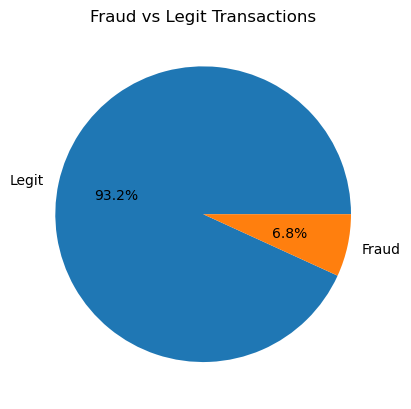

In [13]:
import matplotlib.pyplot as plt

# Count fraud values
counts = df["fraud"].value_counts()

# Create pie chart
plt.pie(counts, labels=["Legit", "Fraud"], autopct="%1.1f%%")
plt.title("Fraud vs Legit Transactions")
plt.show()



## Insight

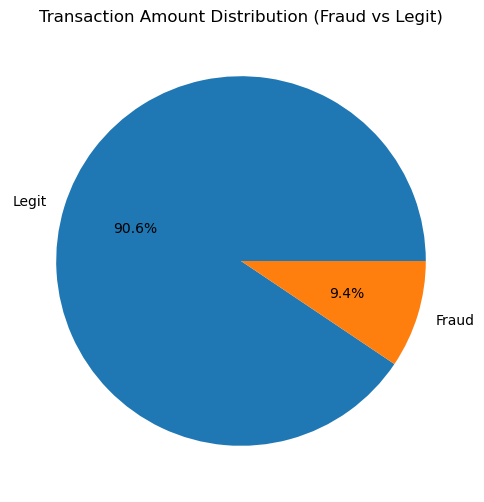

In [18]:
import matplotlib.pyplot as plt

# Calculate total transaction amount for each class
amount = df.groupby("fraud")["transaction_amount"].sum()

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(amount, labels=["Legit", "Fraud"], autopct="%1.1f%%")
plt.title("Transaction Amount Distribution (Fraud vs Legit)")
plt.show()


## Insight

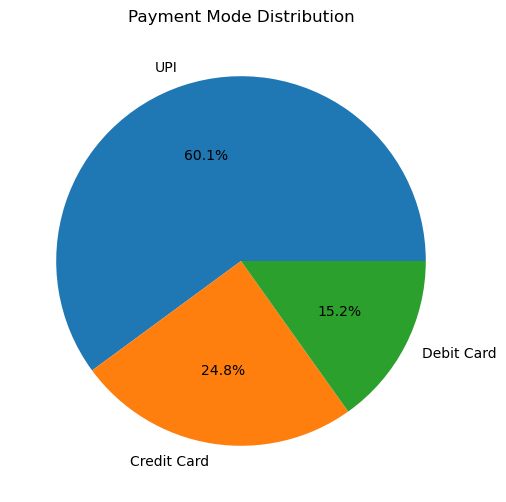

In [19]:
import matplotlib.pyplot as plt

# Count payment modes
counts = df["payment_mode"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Payment Mode Distribution")
plt.show()


## Insight

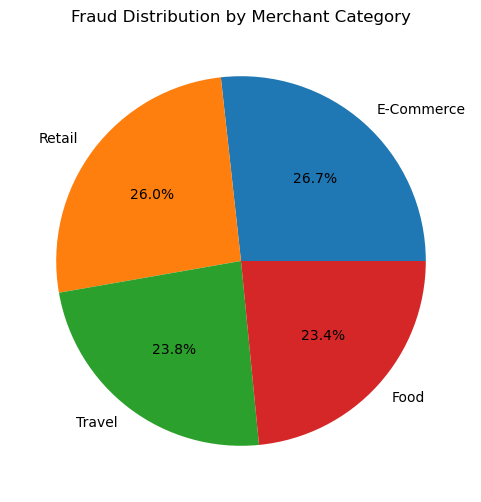

In [20]:
import matplotlib.pyplot as plt

# Filter only fraud transactions
fraud_data = df[df["fraud"] == 1]

# Count merchant categories in fraud
counts = fraud_data["merchant_category"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%")
plt.title("Fraud Distribution by Merchant Category")
plt.show()


## Insight

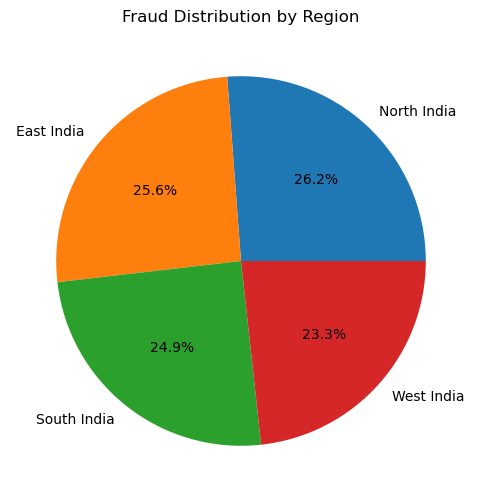

In [21]:
import matplotlib.pyplot as plt

# Filter only fraud transactions
fraud_data = df[df["fraud"] == 1]

# Count fraud per region
region_counts = fraud_data["demography_region"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(region_counts, labels=region_counts.index, autopct="%1.1f%%")
plt.title("Fraud Distribution by Region")
plt.show()



## Insight

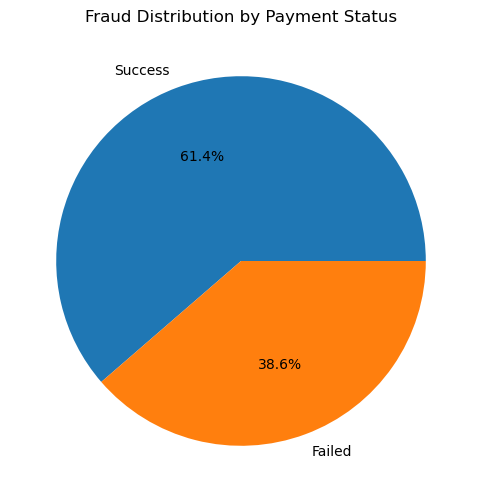

In [22]:
import matplotlib.pyplot as plt

# Filter only fraud transactions
fraud_data = df[df["fraud"] == 1]

# Count payment status in fraud
status_counts = fraud_data["payment_status"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct="%1.1f%%")
plt.title("Fraud Distribution by Payment Status")
plt.show()



## Insight

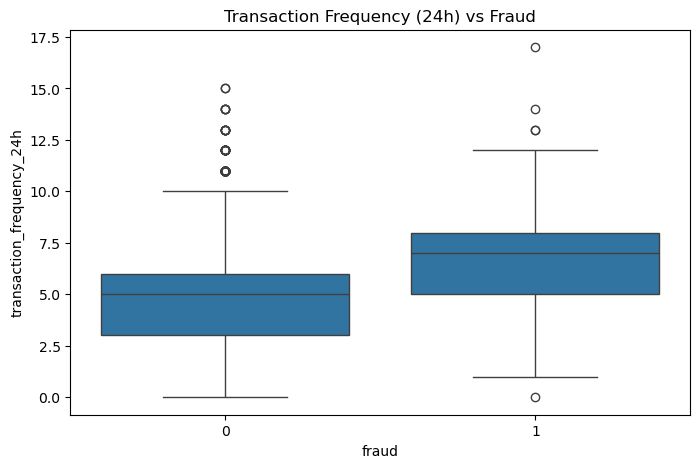

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(x="fraud", y="transaction_frequency_24h", data=df)
plt.title("Transaction Frequency (24h) vs Fraud")
plt.show()


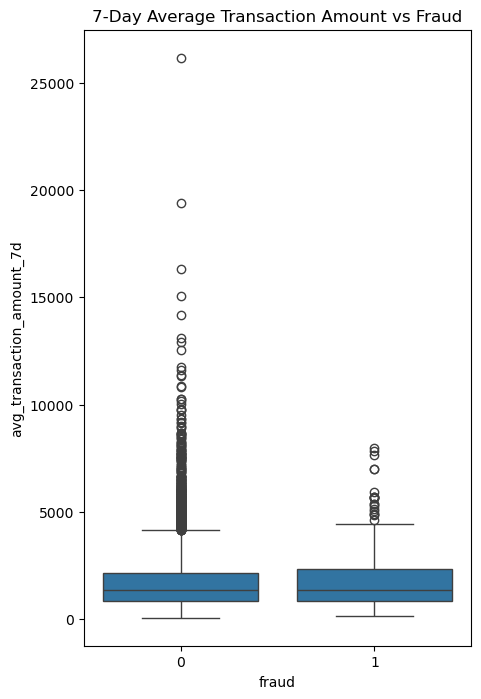

In [27]:
plt.figure(figsize=(5,8))
sns.boxplot(x="fraud", y="avg_transaction_amount_7d", data=df)
plt.title("7-Day Average Transaction Amount vs Fraud")
plt.show()


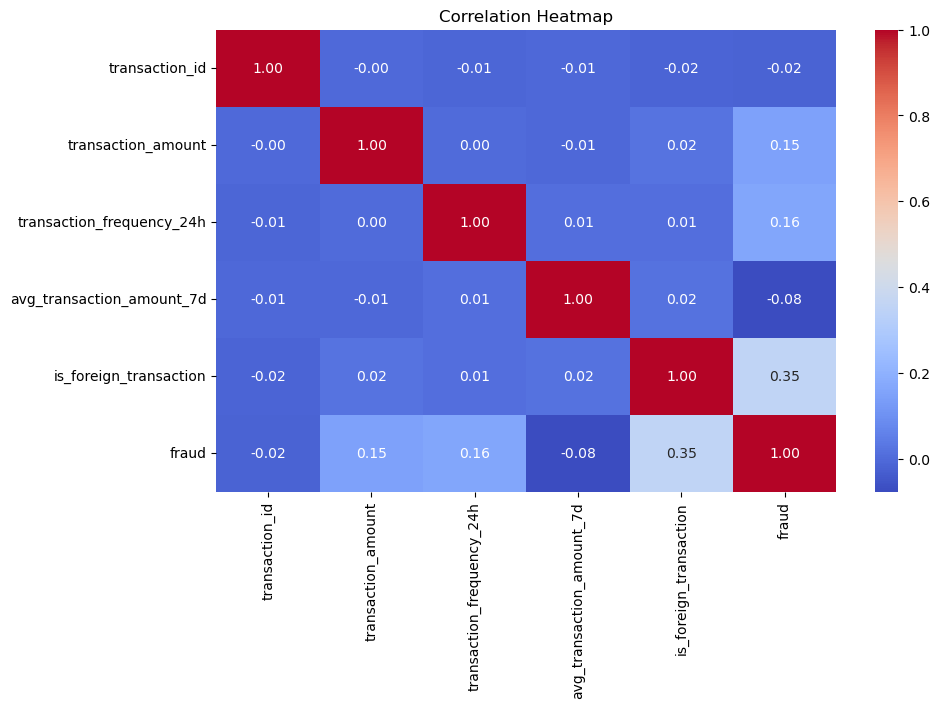

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Insight


In [26]:
X = df.drop(columns=["fraud","transaction_id"])
y = df["fraud"]
            

In [27]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(include=np.number).columns

## Train–Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.25,
    stratify=y,
    random_state=42)

## Logistic Regression

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat",OneHotEncoder(drop="first",handle_unknown="ignore"),cat_features),
        ("num",StandardScaler(),num_features)])
log_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",LogisticRegression(class_weight="balanced",max_iter=2000, solver="lbfgs"))
])
log_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['payment_status', 'payment_mode', 'device_type', 'merchant_category',
       'day_type', 'demography_region'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['transaction_amount', 'transaction_frequency_24h',
       'avg_transaction_amount_7d', 'is_foreign_transaction'],
      dtype='object'))])),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=2000))])

## Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier


In [32]:
rf_model = Pipeline(steps=[
    ("preprocessor",preprocessor),
    ("model",RandomForestClassifier(
        n_estimators=200,
        class_weight="balanced",
        random_state=42))
])
rf_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['payment_status', 'payment_mode', 'device_type', 'merchant_category',
       'day_type', 'demography_region'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['transaction_amount', 'transaction_frequency_24h',
       'avg_transaction_amount_7d', 'is_foreign_transaction'],
      dtype='object'))])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

In [33]:
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
threshold = 0.30
y_pred_rf_adj = (y_prob_rf >= threshold).astype(int)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_adj))



              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1864
           1       0.91      0.87      0.89       136

    accuracy                           0.99      2000
   macro avg       0.95      0.93      0.94      2000
weighted avg       0.99      0.99      0.99      2000



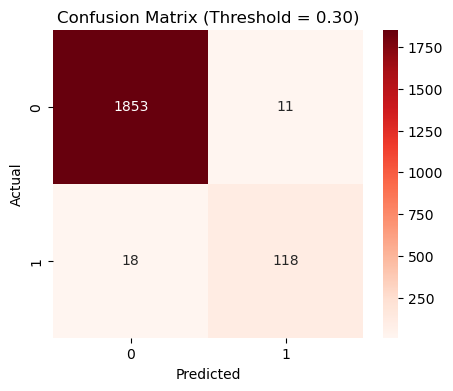

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf_adj)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Threshold = 0.30)")
plt.show()


## ROC–AUC Curve

In [35]:
df.groupby("fraud")[[
    "transaction_amount",
    "transaction_frequency_24h",
    "avg_transaction_amount_7d"
]].mean()


,transaction_amount,transaction_frequency_24h,avg_transaction_amount_7d
fraud,,,
0,2933.943837,4.91025,2457.991929
1,4162.803947,6.35348,1936.667756


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
y_prob_rf=rf_model.predict_proba(X_test)[:,1]
roc_auc=roc_auc_score(y_test,y_prob_rf)
roc_auc

0.9477582207775814

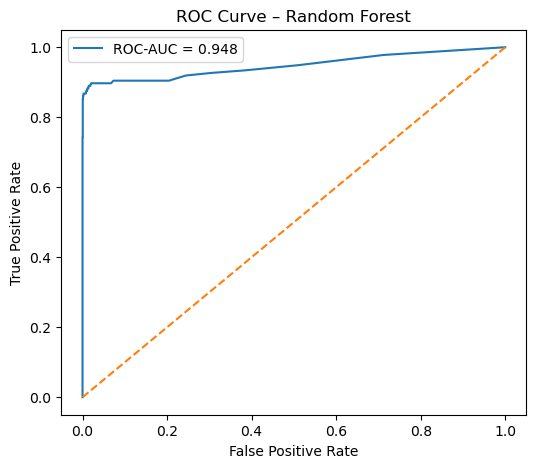

In [37]:
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend()
plt.show()


## Confusion Matrix

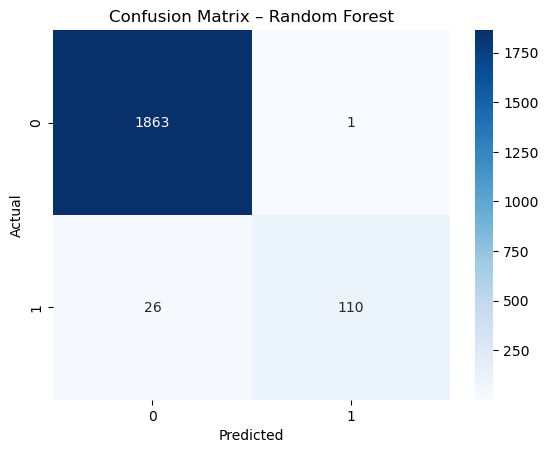

In [38]:
y_pred_rf = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()


In [39]:
import joblib

# Saving trained model

joblib.dump(rf_model, "fraud_detection_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [40]:
# Loading model

loaded_model = joblib.load("fraud_detection_model.pkl")
print("Model loaded successfully!")


Model loaded successfully!


## Predicting Fraud for a New Transaction

In [41]:
# Sample new transaction (unseen data)
new_transaction = pd.DataFrame({
    "transaction_amount": [8500],
    "day_type": ["Weekend"],
    "payment_mode": ["UPI"],
    "merchant_category": ["E-Commerce"],
    "transaction_frequency_24h": [8],
    "avg_transaction_amount_7d": [2500],
    "device_type": ["Mobile"],
    "is_foreign_transaction": [0],
    "demography_region": ["North India"],
    "payment_status": ["Failed"]
})


In [42]:
# Predicting  probability

fraud_prob = loaded_model.predict_proba(new_transaction)[:, 1]
fraud_prob


array([0.83])

In [43]:
threshold = 0.30

fraud_prediction = (fraud_prob >= threshold).astype(int)

if fraud_prediction[0] == 1:
    print("⚠️ Fraudulent Transaction Detected")
else:
    print("✅ Legitimate Transaction")


⚠️ Fraudulent Transaction Detected


## Conclusion
